# STUDY 3: The impact of cross-platform discrepancies on market uncertainty

### Study assumption
 Large discrepancies between ISP and
BSP equates to market uncertainty and offers potential
profit.


### Data used
 BSP, ISP data from 2010 - 2022

### Introduction

 The focus of this study is to explore the
relationship between exchange and bookmaker activity.
To do this, we can compare ISP and BSP prices, which are
the best indicators of market activity we have data on (for
both platforms). Our previous studies have shown that
BSP prices are ubiquitously more competitive than ISP
prices. This leads us to question whether horses with
larger differences between BSP and ISP prices may be
indicative of an uncertain market.

It's worth noting that while we have access to a wealth of
information about trading activity on exchanges (such as
traded volume and average price traded, which have been
examined in their own separate studies), bookmaker trading
levels are not publicly available. This makes it difficult to fully
assess the market dynamics at play, as we only have the final
starting ISP to measure bookmaker activity. However, because
we are solely focusing on starting prices, we do have access to
larger data sets dating back to January 2010. This allows us to
examine a wider range of data and potentially identify longerterm trends or patterns. 


### Key Findings

- There is a positive correlation between the difference in starting prices and return on investment, even when price ranges are equalized.
- Return on investment is not always the most important metric when determining a strategies long term success.
- When using data that covers a long period of time, one must include the changing market environment and activity when determining a strategies long term success.

### EDA
For this study, we will be using Betfiar Exchange and bookmaker data from 2010 to 2022, covering a 12-year time period. At the moment these data sets are stored separately so we need to combine them.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set(rc={'figure.figsize':(2.5,1.5)})
sns.set_style("white")

In [3]:
title_font = {'family': 'Trebuchet MS', 'weight': 'semibold', 'size': 5, 'color': 'dimgrey'}
label_font = {'family': 'Trebuchet MS', 'size': 4, 'color': 'dimgrey'}

In [4]:
bsp_cols = ['name', 'time', 'date', 'bsp', 'bspr']
bsp_df = pd.read_csv('data/2010-22_BSP Data.csv', usecols=bsp_cols)

In [5]:
bsp_df.head()

,name,bsp,date,time,bspr
0,The Sneezer,4.134344,01/01/2010,12:20,-1.000000
1,Echo Bob,4.734877,01/01/2010,12:20,-1.000000
2,Club Oscar,5.910360,01/01/2010,12:20,-1.000000
3,Grand Lahou,7.472524,01/01/2010,12:20,6.343073
4,Nans Best,9.246182,01/01/2010,12:20,-1.000000


In [6]:
isp_cols = ['name', 'time', 'date', 'runners', 'decimalPrice']
isp_df_1 = pd.read_csv('data/2010-20_ISP_Data.csv', usecols=isp_cols)
isp_df_2 = pd.read_csv('data/2020-22_ISP_Data.csv', usecols=isp_cols)

In [7]:
isp_df = pd.concat([isp_df_1, isp_df_2]).reset_index(drop=True)

In [8]:
isp_df.head()

,name,runners,decimalPrice,time,date
0,Tetlami,15,0.200000,15:50,01/01/2010
1,Romulus Dartaix,15,0.142857,15:50,01/01/2010
2,Marleno,15,0.024390,15:50,01/01/2010
3,My Brother Sylvest,15,0.076923,15:50,01/01/2010
4,Karasenir,15,0.076923,15:50,01/01/2010


In [9]:
df = (pd.merge(bsp_df, isp_df, on=['name', 'time', 'date'])
      .astype({'bsp': 'float32', 'runners': 'int16'})
      .rename(columns=({'decimalPrice': 'isp'}))
      .sort_values(['date', 'time']))

In [10]:
df.head()

,name,bsp,date,time,bspr,runners,isp
0,The Sneezer,4.134344,01/01/2010,12:20,-1.000000,8,0.250000
1,Echo Bob,4.734878,01/01/2010,12:20,-1.000000,8,0.250000
2,Club Oscar,5.910360,01/01/2010,12:20,-1.000000,8,0.181818
3,Grand Lahou,7.472524,01/01/2010,12:20,6.343073,8,0.153846
4,Nans Best,9.246182,01/01/2010,12:20,-1.000000,8,0.133333


We now have both the ISP and BSP data however, there is a discrepancy in the format of their prices. BSP prices are in decimal format whereas ISP prices are in percentages. We need to adjust the prices so that they are in the same format and easier to compare.

In [11]:
df['bsp_percent'] = ((1/df['bsp'])*100).round(3)
df['isp_percent'] = (df['isp']*100).round(3)

In [12]:
df.head()

,name,bsp,date,time,bspr,runners,isp,bsp_percent,isp_percent
0,The Sneezer,4.134344,01/01/2010,12:20,-1.000000,8,0.250000,24.188000,25.000
1,Echo Bob,4.734878,01/01/2010,12:20,-1.000000,8,0.250000,21.120001,25.000
2,Club Oscar,5.910360,01/01/2010,12:20,-1.000000,8,0.181818,16.919001,18.182
3,Grand Lahou,7.472524,01/01/2010,12:20,6.343073,8,0.153846,13.382000,15.385
4,Nans Best,9.246182,01/01/2010,12:20,-1.000000,8,0.133333,10.815000,13.333


Next we will calculate the difference between BSP and ISP prices. Once this is done, we will split the 'difference' values into 10 deciles and investigate the connection between the price and the difference between ISP and BSP prices. Note that we will only be examining prices that have BSP values of 50 or below.

In [13]:
df = (df
      .assign(price_diff = df[['bsp_percent', 'isp_percent']].pct_change(axis=1)['isp_percent'])
      .query('bsp<=50 & price_diff>=0')
      .assign(price_diff_decile = lambda x: pd.qcut(x["price_diff"], q=10, precision=1, labels=range(1, 11))))

In [14]:
df[['bsp_percent', 'isp_percent', 'price_diff']].describe().round(3)

,bsp_percent,isp_percent,price_diff
count,1016133.000,1016133.000,1016133.000
mean,12.627,14.645,0.268
std,11.354,11.708,0.249
min,2.000,2.439,0.000
25%,4.762,6.667,0.102
50%,9.091,11.111,0.200
75%,16.577,18.182,0.352
max,96.652,98.039,7.653


`boxplot` displaying the relationship between price and price difference.

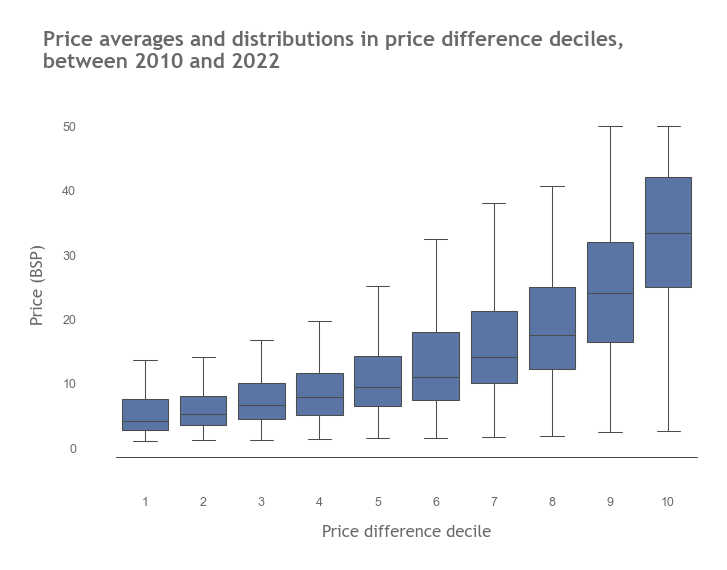

In [15]:
# create the figure and axes
fig, ax = plt.subplots()

# plot boxplot
sns.boxplot(x='price_diff_decile', y='bsp', data=df, showfliers=False, linewidth=.25, color='b', ax=ax)

# set title and axis labels
ax.set_title('Price averages and distributions in price difference deciles,\nbetween 2010 and 2022',
             fontdict=title_font, x=-0.125, y=1.05, ha='left')
ax.set_ylabel('Price (BSP)', fontdict=label_font)
ax.set_xlabel('Price difference decile', fontdict=label_font)

# adjust axis, grid lines
sns.despine(left=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)

plt.show()

In [16]:
df['price_diff_decile'].corr(df['bsp'])

0.6682408918856864

`barplot` showing the total profit/loss of the 10 percentiles from 2010-22.

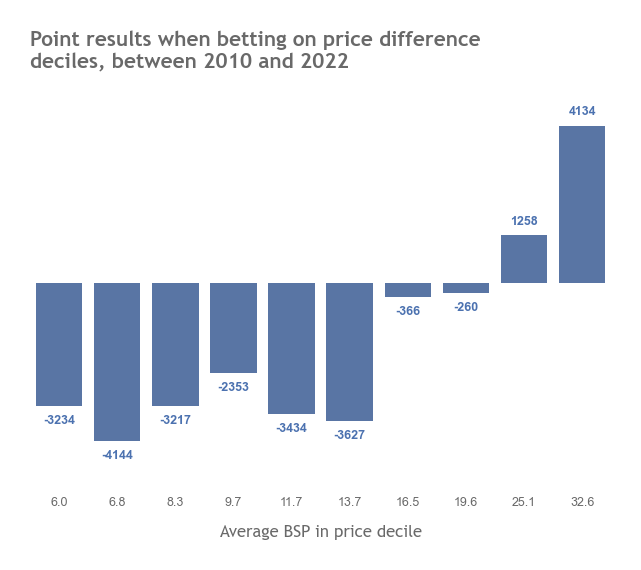

In [17]:
# create the figure and axes
fig, ax = plt.subplots()

# plot barplot
sns.barplot(x='price_diff_decile', y='bspr', data=df, errorbar=None, estimator=sum, edgecolor=".3", linewidth=0, color='b', ax=ax)

# set title and axis labels
ax.set_title('Point results when betting on price difference\ndeciles, between 2010 and 2022',
             fontdict=title_font, x=0, y=1.05, ha='left')
ax.set_ylabel('')
ax.set_xlabel('Average BSP in price decile', fontdict=label_font)
avg_bsp = (df.groupby('price_diff_decile')['bsp'].mean().astype('float').round(1))
ax.set_xticklabels(avg_bsp)

# adjust axis, grid lines
sns.despine(left=True, bottom=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)
plt.yticks([], [])

# add bar labels
bar_labels = ['{:.0f}'.format(rect.get_height())for rect in ax.containers[0]]
plt.bar_label(ax.containers[0], fontsize=3, color='b', weight='bold', padding=2, labels=bar_labels)

plt.show()

Now we split the 10 percentiles into 3 larger groups, representing `small`, `medium` and `big` difference in prices.

In [18]:
small_differences = df[df.price_diff_decile<4]
medium_differences = df[(df.price_diff_decile>=4) & (df.price_diff_decile<=7)]
big_differences = df[df.price_diff_decile>7]

In [19]:
print(f'Small Differences P/L = {small_differences.bspr.sum().round(2)}')
print(f'Small Differences ROI = {(((len(small_differences) + small_differences.bspr.sum()) / len(small_differences) * 100)-100).round(2)}%')
print(f'Small Differences Ave BSP = {(small_differences.bsp.mean()).round()}')
print('----------')
print(f'Medium Differences P/L = {medium_differences.bspr.sum().round(2)}')
print(f'Medium Differences ROI = {(((len(medium_differences) + medium_differences.bspr.sum()) / len(medium_differences) * 100)-100).round(2)}%')
print(f'Medium Differences Ave BSP = {(medium_differences.bsp.mean()).round()}')
print('----------')
print(f'Big Differences P/L = {big_differences.bspr.sum().round(2)}')
print(f'Big Differences ROI = {(((len(big_differences) + big_differences.bspr.sum()) / len(big_differences) * 100)-100).round(2)}%')
print(f'Big Differences Ave BSP = {(big_differences.bsp.mean()).round()}')

Small Differences P/L = -10594.26
Small Differences ROI = -3.47%
Small Differences Ave BSP = 7.0
----------
Medium Differences P/L = -9779.53
Medium Differences ROI = -2.41%
Medium Differences Ave BSP = 13.0
----------
Big Differences P/L = 5131.91
Big Differences ROI = 1.69%
Big Differences Ave BSP = 26.0


In [20]:
df['bspr'].corr(df['price_diff'])

0.005988408876963032

Here we see a positive correlation between the difference in BSP and ISP prices and the return on
investment (ROI). Specifically, the last few deciles show significant profit. However, as we have previously established, the ROI for each
price range is not the same. 

When we examine the distribution displayed in the box plot above, we see that the average price in each decile increases
as the deciles increase. In order to determine whether this positive correlation is simply due to higher prices being in higher deciles, we
need to adjust the deciles so that they contain roughly similar average prices and distributions. This will allow us to more accurately
assess the relationship between price difference and ROI. We will do this by creating deciles based on the difference in prices compared
to the average of the specific price ranges (instead of all prices).

Spliting data into ten deciles based on the BSP price and getting the average difference between BSP and ISP for each price decile. This will allow us to compare each selection's price difference to the average price difference within its own price range, rather than against all prices.

In [21]:
df["bsp_decile"] = pd.qcut(df["bsp"], q=10, precision=1, labels=range(1, 11))

In [22]:
ave_price_diff = (df
                  .loc[:, ['bsp', 'isp_percent', 'bsp_percent',
                           'price_diff', 'bsp_decile', 'bspr']]
                  .groupby('bsp_decile',as_index=False)
                  .agg({'bsp_decile': 'first', 'bsp': 'mean', 'price_diff': 'mean'})
                  .rename(columns=({'bsp': 'average_bsp', 'price_diff': 'average_price_diff'}))
                  .astype('float')
                  .round(5))

In [23]:
ave_price_diff

,bsp_decile,average_bsp,average_price_diff
0,1.0,2.73813,0.07018
1,2.0,4.52863,0.11110
2,3.0,6.09994,0.14400
3,4.0,7.87355,0.16678
4,5.0,9.89854,0.18903
5,6.0,12.54305,0.25402
6,7.0,16.05771,0.29498
7,8.0,20.95398,0.35746
8,9.0,28.33377,0.46134
9,10.0,40.97116,0.63623


Creating new decile groups based on the comparison of ISP, BSP difference and their price range ISP, BSP difference average.

In [24]:
df = (pd.merge(df, ave_price_diff, on='bsp_decile')
      .assign(price_diff_comapred_to_ave = lambda x: x[['average_price_diff', 'price_diff']].pct_change(axis=1)['price_diff'])
      .assign(diff_decile_2 = lambda x: pd.qcut(x["price_diff_comapred_to_ave"], q=10, precision=1, labels=range(1, 11))))

In [25]:
df[['bsp', 'bsp_percent', 'isp_percent', 'price_diff', 'average_price_diff',
    'price_diff_decile', 'diff_decile_2']].head()

,bsp,bsp_percent,isp_percent,price_diff,average_price_diff,price_diff_decile,diff_decile_2
0,4.134344,24.188000,25.000,0.033570,0.1111,1,1
1,4.734878,21.120001,25.000,0.183712,0.1111,5,9
2,5.000000,20.000000,22.222,0.111100,0.1111,3,6
3,3.870721,25.834999,26.667,0.032204,0.1111,1,1
4,4.691612,21.315001,25.000,0.172883,0.1111,5,9


`boxplot` displaying the relationship between price and our new `diff_percentile_2` values.

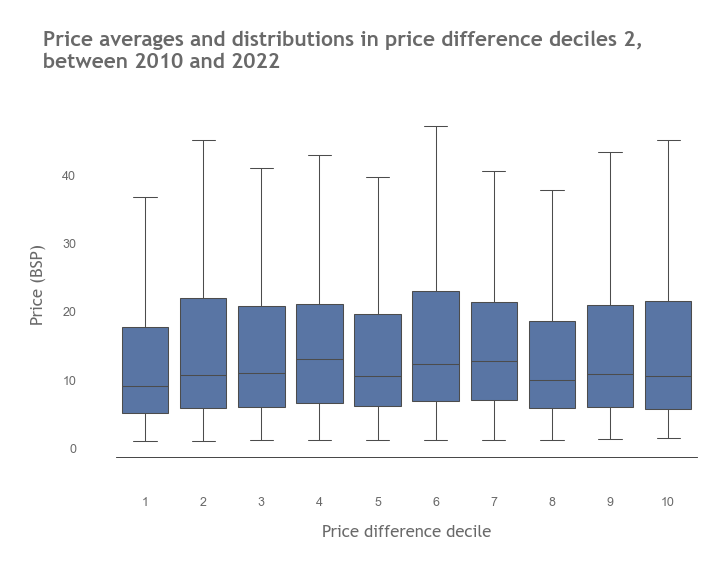

In [26]:
# create the figure and axes
fig, ax = plt.subplots()

# plot boxplot
sns.boxplot(x='diff_decile_2', y='bsp', data=df, showfliers=False, linewidth=.25, color='b', ax=ax)

# set title and axis labels
ax.set_title('Price averages and distributions in price difference deciles 2,\nbetween 2010 and 2022',
             fontdict=title_font, x=-0.125, y=1.05, ha='left')
ax.set_ylabel('Price (BSP)', fontdict=label_font)
ax.set_xlabel('Price difference decile', fontdict=label_font)

# adjust axis, grid lines
sns.despine(left=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)

plt.show()

In [27]:
df['diff_decile_2'].corr(df['bsp'])

0.021562744795587452

Our deciles are now much more evenly distributed, with only a minimal 0.02 correlation to BSP price.

`barplot` using diff_decile_2

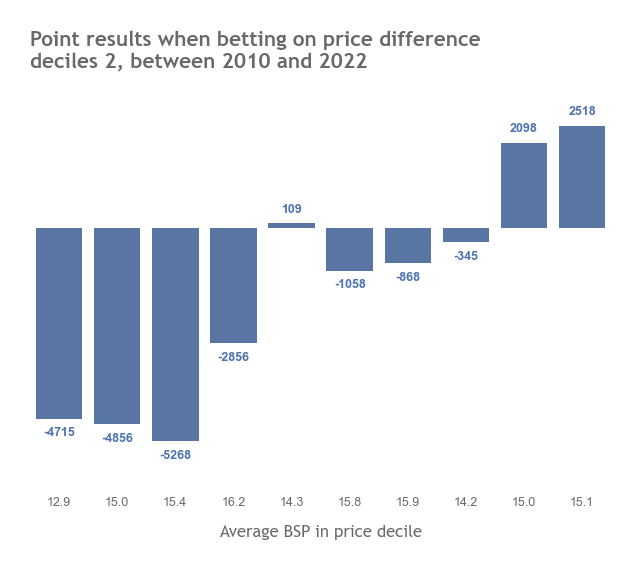

In [28]:
# create the figure and axes
fig, ax = plt.subplots()


# plot barplot
sns.barplot(x='diff_decile_2', y='bspr', data=df, errorbar=None, estimator=sum, edgecolor=".3", linewidth=0, color='b', ax=ax)

# set title and axis labels
ax.set_title('Point results when betting on price difference\ndeciles 2, between 2010 and 2022',
             fontdict=title_font, x=0, y=1.05, ha='left')
ax.set_ylabel('')
ax.set_xlabel('Average BSP in price decile', fontdict=label_font)
avg_bsp = (df.groupby('diff_decile_2')['bsp'].mean().astype('float').round(1))
ax.set_xticklabels(avg_bsp)

# adjust axis, grid lines
sns.despine(left=True, bottom=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)
plt.yticks([], [])

# add bar labels
bar_labels = ['{:.0f}'.format(rect.get_height())for rect in ax.containers[0]]
plt.bar_label(ax.containers[0], fontsize=3, color='b', weight='bold', padding=2, labels=bar_labels)

plt.show()

In [29]:
small_differences = df[df.diff_decile_2<4]
medium_differences = df[(df.diff_decile_2>=4) & (df.diff_decile_2<=7)]
big_differences = df[df.diff_decile_2>7]

In [30]:
print(f'Small Differences P/L = {small_differences.bspr.sum().round(2)}')
print(f'Small Differences ROI = {(((len(small_differences) + small_differences.bspr.sum()) / len(small_differences) * 100)-100).round(2)}%')
print(f'Small Differences Ave BSP = {(small_differences.bsp.mean()).round()}')
print('----------')
print(f'Medium Differences P/L = {medium_differences.bspr.sum().round(2)}')
print(f'Medium Differences ROI = {(((len(medium_differences) + medium_differences.bspr.sum()) / len(medium_differences) * 100)-100).round(2)}%')
print(f'Medium Differences Ave BSP = {(medium_differences.bsp.mean()).round()}')
print('----------')
print(f'Big Differences P/L = {big_differences.bspr.sum().round(2)}')
print(f'Big Differences ROI = {(((len(big_differences) + big_differences.bspr.sum()) / len(big_differences) * 100)-100).round(2)}%')
print(f'Big Differences Ave BSP = {(big_differences.bsp.mean()).round()}')

Small Differences P/L = -14839.2
Small Differences ROI = -4.87%
Small Differences Ave BSP = 14.0
----------
Medium Differences P/L = -4673.69
Medium Differences ROI = -1.15%
Medium Differences Ave BSP = 16.0
----------
Big Differences P/L = 4271.01
Big Differences ROI = 1.4%
Big Differences Ave BSP = 15.0


In [31]:
df['bspr'].corr(df['price_diff_comapred_to_ave'])

0.005726180133731861

Upon adjusting the deciles to contain evenly distributed price ranges, we have observed an almost identical
positive correlation between the difference in BSP and ISP prices and ROI.

Looking at the prices with biggest difference between ISP and BSP (decile 10).

In [32]:
biggest_differences = df[df.diff_decile_2==10].copy()

In [33]:
print(f'Biggest Differences P/L = {biggest_differences.bspr.sum().round(2)}')
print(f'Biggest Differences ROI = {(((len(biggest_differences) + biggest_differences.bspr.sum()) / len(biggest_differences) * 100)-100).round(2)}%')
print(f'Biggest Differences Ave BSP = {(biggest_differences.bsp.mean()).round()}')

Biggest Differences P/L = 2517.9
Biggest Differences ROI = 2.48%
Biggest Differences Ave BSP = 15.0


`barplot` showing the yearly total profit/loss when betting on all `big difference` horses.

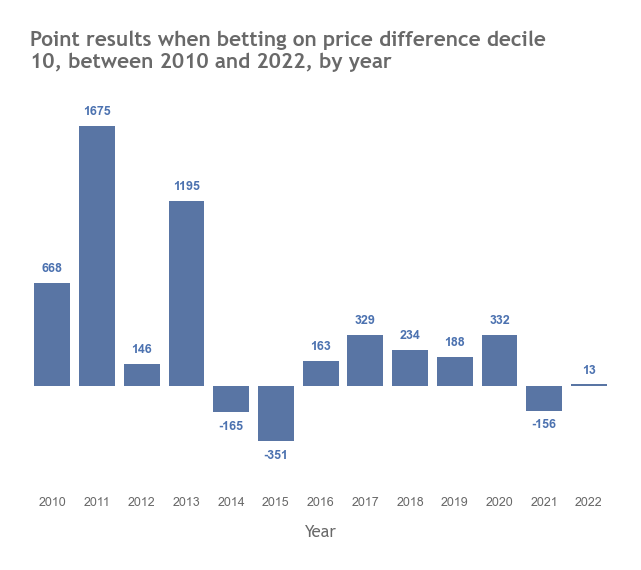

In [34]:
# set year groups
big_differences.date = pd.to_datetime(big_differences.date, format="%d/%m/%Y")
big_differences_year = big_differences.resample('Y', on='date').agg({'date': 'first', 'bspr': 'sum'})
years = [dt.year for dt in big_differences_year['date']]
unique_years = sorted(list(set(years)))
x_values = [years.index(year) for year in unique_years]

# create the figure and axes
fig, ax = plt.subplots()

# plot baplot
sns.barplot(x='date', y='bspr', data=big_differences_year, edgecolor='.3', linewidth=0, color='b', ax=ax)

# set title and axis labels
ax.set_title('Point results when betting on price difference decile\n10, between 2010 and 2022, by year',
             fontdict=title_font, x=0, y=1.05, ha='left')
ax.set_ylabel('')
ax.set_xlabel('Year', fontdict=label_font)

# adjust axis, grid lines
sns.despine(left=True, bottom=True)

# adjust parameters
plt.xticks([])
plt.xticks(x_values, unique_years)
plt.yticks([], [])
ax.tick_params(colors='dimgrey', labelsize=3)     


# add bar labels
bar_labels = ['{:.0f}'.format(rect.get_height())for rect in ax.containers[0]]
plt.bar_label(ax.containers[0], fontsize=3, color='b', weight='bold', padding=2, labels=bar_labels)

plt.show()

This strategy seemed to be more effective in the early 2010s compared to recent years. It's worth considering whether this could be a coincidence, or if it reflects a change in the market as the exchange has grown over time and trading activity / liquidity increases. All possibilities must be considered and factored into future studies in order to better understand this trend.